<a href="https://colab.research.google.com/github/Fauzan-Al1/Deep_Learning/blob/main/Deep_Learning_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
df = pd.read_json('/content/DeteksiSarkasme.json', lines=True)
print(df.head())
print("Jumlah data:", len(df))

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
Jumlah data: 26709


In [17]:
# Ambil fitur dan label
texts = df['headline'].values
labels = df['is_sarcastic'].values
# Ambil fitur dan label
texts = df['headline'].values
labels = df['is_sarcastic'].values

# Parameter tokenisasi
max_vocab = 10000       # batas maksimal jumlah kata
max_length = 100         # panjang maksimal sequence (dapat disesuaikan)

# Tokenisasi
tokenizer = Tokenizer(num_words=max_vocab, oov_token='')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
print("Ukuran train:", X_train.shape, "Ukuran test:", X_test.shape)
# Tokenisasi
tokenizer = Tokenizer(num_words=max_vocab, oov_token='')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
print("Ukuran train:", X_train.shape, "Ukuran test:", X_test.shape)

Ukuran train: (21367, 100) Ukuran test: (5342, 100)
Ukuran train: (21367, 100) Ukuran test: (5342, 100)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Embedding

# Contoh Hyperparameter
embedding_dim = 64
units = 128
drop_rate = 0.2
input_dim = 5000     # Jumlah kata unik (vocab size)
input_length = 100   # Panjang input sequence

def create_rnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=input_length))
    model.add(SimpleRNN(units))
    model.add(Dropout(drop_rate))
    model.add(Dense(1, activation='sigmoid'))  # Untuk klasifikasi biner
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=input_length))
    model.add(LSTM(units))
    model.add(Dropout(drop_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units))
    model.add(Dropout(drop_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense, Embedding
import numpy as np

# Hyperparameter umum
epochs = 10
batch_size = 32
embedding_dim = 128
max_len = X_train.shape[1]  # panjang input (sequence length)
vocab_size = 5000  # ganti dengan jumlah token unik sebenarnya

# --- Tambahkan 1 dimensi untuk RNN & GRU ---
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# --- RNN ---
def create_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# --- LSTM --- (Tanpa `Embedding`, langsung menggunakan 3D input)
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- GRU ---
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ----- TRAIN & EVALUATE -----
# RNN
rnn_model = create_rnn_model()
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=0.1, verbose=1)
rnn_loss, rnn_acc = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Test Accuracy:", rnn_acc)

# LSTM
lstm_model = create_lstm_model()
history_lstm = lstm_model.fit(X_train_rnn, y_train, epochs=epochs, batch_size=batch_size,
                              validation_split=0.1, verbose=1)
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_rnn, y_test)
print("LSTM Test Accuracy:", lstm_acc)

# GRU
gru_model = create_gru_model()
history_gru = gru_model.fit(X_train_rnn, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=0.1, verbose=1)
gru_loss, gru_acc = gru_model.evaluate(X_test_rnn, y_test)
print("GRU Test Accuracy:", gru_acc)


Epoch 1/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.5294 - loss: 0.7034 - val_accuracy: 0.5540 - val_loss: 0.6897
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.5235 - loss: 0.7116 - val_accuracy: 0.5517 - val_loss: 0.6898
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5295 - loss: 0.7008 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.5471 - loss: 0.6914 - val_accuracy: 0.5517 - val_loss: 0.6879
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.5427 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6882
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.5532 - loss: 0.6890 - val_accuracy: 0.5517 - val_loss: 0.6882
Epoch 7/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5584 - loss: 0.6875 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 8/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5588 - loss: 0.6876 - 

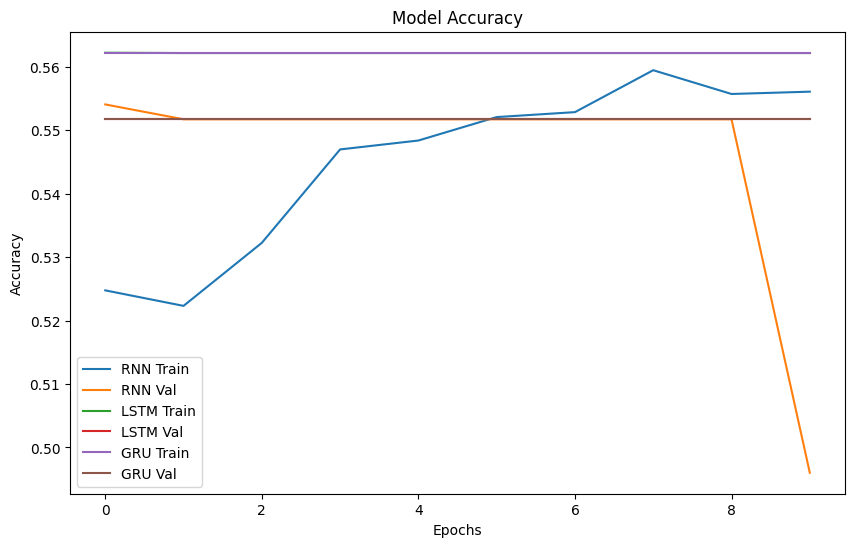

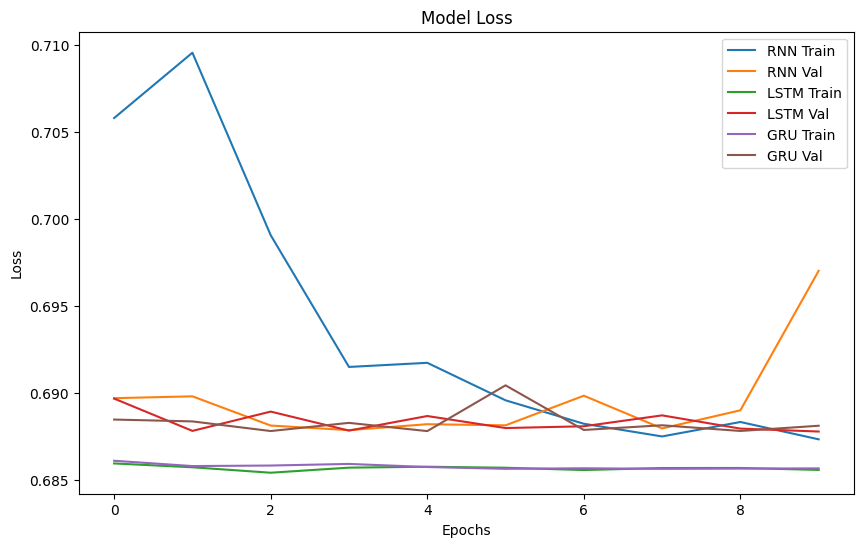

In [32]:
# Fungsi untuk plot
def plot_history(histories, metric='accuracy'):
    plt.figure(figsize=(10, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history['val_' + metric], label=f'{name} Val')
    plt.title(f'Model {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

histories = {'RNN': history_rnn, 'LSTM': history_lstm, 'GRU': history_gru}
plot_history(histories, metric='accuracy')
plot_history(histories, metric='loss')

In [33]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [34]:
# Pastikan Keras Tuner sudah terinstall: pip install keras-tuner
import kerastuner as kt

def build_model(hp):
    model = Sequential()
    hp_embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=128, step=32)
    model.add(Embedding(max_vocab, hp_embedding_dim, input_length=max_length))

    # Pilih tipe layer recurrent secara dinamis (contoh: LSTM)
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    hp_drop = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(LSTM(hp_units, dropout=hp_drop, recurrent_dropout=hp_drop))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='kt_tuner_dir',
    project_name='sarcasm_classification'
)

tuner.search(X_train, y_train, epochs=5, validation_split=0.1)
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 5 Complete [00h 06m 38s]
val_accuracy: 0.5517079830169678

Best val_accuracy So Far: 0.5517079830169678
Total elapsed time: 00h 41m 32s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 96)             │        49,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,633 (1.41 MB)

 Trainable params: 369,633 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best dropout value:", best_hp.get('dropout'))

Best dropout value: 0.5


In [39]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

# Contoh reshape X_train dan X_test (anggap data awalnya 2D: (samples, timesteps))
# Kamu bisa skip ini jika datamu sudah dalam 3D
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Fungsi untuk membuat model (untuk Keras Tuner)
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Inisialisasi tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Jalankan tuning
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1,
             callbacks=[early_stop, reduce_lr])

# Ambil hyperparameter terbaik
best_hp = tuner.get_best_hyperparameters()[0]

# Buat dan latih model dengan hyperparameter terbaik
final_model = build_model(best_hp)
final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1,
                callbacks=[early_stop, reduce_lr])

# Evaluasi model final
final_loss, final_acc = final_model.evaluate(X_test, y_test)
print("Final Model Test Accuracy:", final_acc)


Trial 5 Complete [00h 12m 41s]
val_accuracy: 0.5517079830169678

Best val_accuracy So Far: 0.6303228735923767
Total elapsed time: 01h 11m 42s
Epoch 1/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 63s 102ms/step - accuracy: 0.5534 - loss: 0.6870 - val_accuracy: 0.5648 - val_loss: 0.6672 - learning_rate: 1.0000e-04
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.5798 - loss: 0.6673 - val_accuracy: 0.6191 - val_loss: 0.6583 - learning_rate: 1.0000e-04
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 61s 101ms/step - accuracy: 0.5948 - loss: 0.6580 - val_accuracy: 0.6153 - val_loss: 0.6504 - learning_rate: 1.0000e-04
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 61s 101ms/step - accuracy: 0.6072 - loss: 0.6522 - val_accuracy: 0.6182 - val_loss: 0.6536 - learning_rate: 1.0000e-04
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.6119 - loss: 0.6520 - val_accuracy: 0.5957 - val_loss: 0.6514 - learning_rate: 1.0000e-04
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accura

Epoch 1/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 69s 114ms/step - accuracy: 0.6261 - loss: 0.6427 - val_accuracy: 0.6289 - val_loss: 0.6451 - learning_rate: 2.0000e-05
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 74s 102ms/step - accuracy: 0.6230 - loss: 0.6414 - val_accuracy: 0.6275 - val_loss: 0.6436 - learning_rate: 2.0000e-05
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.6263 - loss: 0.6426 - val_accuracy: 0.6125 - val_loss: 0.6420 - learning_rate: 2.0000e-05
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 84s 104ms/step - accuracy: 0.6238 - loss: 0.6412 - val_accuracy: 0.6191 - val_loss: 0.6412 - learning_rate: 2.0000e-05
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.6226 - loss: 0.6405 - val_accuracy: 0.6275 - val_loss: 0.6424 - learning_rate: 2.0000e-05
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.6176 - loss: 0.6434 - val_accuracy: 0.6102 - val_loss: 0.6412 - learning_rate: 2.0000e-05
Epoch 7/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 60s 100

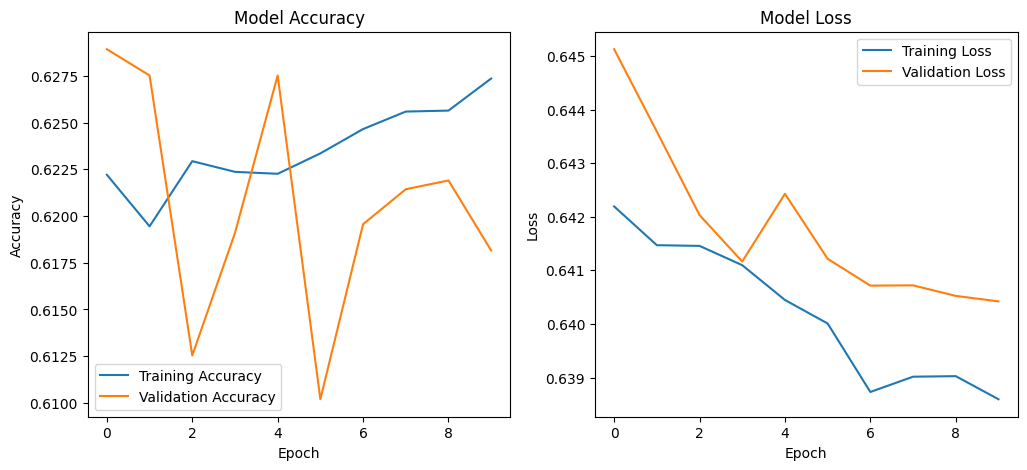

167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step


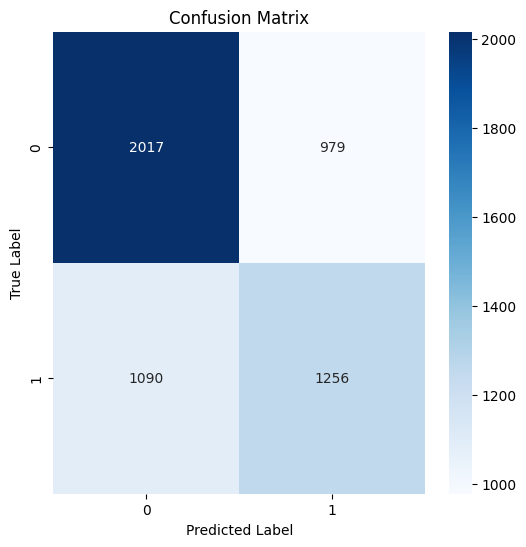

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      2996
           1       0.56      0.54      0.55      2346

    accuracy                           0.61      5342
   macro avg       0.61      0.60      0.60      5342
weighted avg       0.61      0.61      0.61      5342



In [41]:
# Training model
final_history = final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1,
                                callbacks=[early_stop, reduce_lr])

# Visualisasi Akurasi dan Loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

plt.figure(figsize=(12,5))

# Plot Akurasi
plt.subplot(1,2,1)
plt.plot(final_history.history['accuracy'], label='Training Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Analisis Error: Confusion Matrix dan Classification Report
y_pred_probs = final_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
